In [11]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [12]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [13]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [14]:
NOTEBOOK_NAME = 'similarity_dhpc_JSB'

In [15]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [16]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [17]:
#all_animals = pre_animals = post_animals = np.loadtxt('../allmice.txt', dtype=str)
#print all_animals

all_animals = 'dhpcg1','dhpcg20','dhpc24'#, '93'#,'c4m4'


In [18]:
# define traces, events, and time axis.
corrmat_distr = load_all_animals_vars('corrmat_distr', all_animals, notebook='similarity_JSB')
corrmat = load_all_animals_vars('corrmat', all_animals, notebook='similarity_JSB')

In [19]:
pairs_to_plot = [('3odor_pre-CSmt-cs', '3odor_pre-CSmt-cs'),
                 ('3odor_pre-CSmt-tr', '3odor_pre-CSmt-tr'),
                 ('3odor_pre-CSmt-us', '3odor_pre-CSmt-us'),
                 ('3odor_pre-CSmt-cs', '3odor_pre-CSmt-us'),                                  
                 ('3odor_pre-CSmt-cs', '3odor_pre-CSmt-tr'),
                 ('3odor_pre-CSmt-us', '3odor_pre-CSmt-tr'),
                 ('3odor_pre-rewardt-cs', '3odor_pre-rewardt-cs'),
                 ('3odor_pre-rewardt-tr', '3odor_pre-rewardt-tr'),
                 ('3odor_pre-rewardt-us', '3odor_pre-rewardt-us'),               
                 ('3odor_pre-rewardt-cs', '3odor_pre-rewardt-us'),
                 ('3odor_pre-rewardt-cs', '3odor_pre-rewardt-tr'),
                 ('3odor_pre-rewardt-us', '3odor_pre-rewardt-tr'),
                 ('3odor_pre-sht-cs', '3odor_pre-sht-cs'),
                 ('3odor_pre-sht-tr', '3odor_pre-sht-tr'),
                 ('3odor_pre-sht-us', '3odor_pre-sht-us'),
                 ('3odor_pre-sht-cs', '3odor_pre-sht-us'),
                 ('3odor_pre-sht-cs', '3odor_pre-sht-tr'),
                 ('3odor_pre-sht-tr', '3odor_pre-sht-us'),
                 ('3odor_pre-CSmt-cs', '3odor_pre-rewardt-cs'),
                 ('3odor_pre-CSmt-cs', '3odor_pre-rewardt-tr'),  
                 ('3odor_pre-CSmt-cs', '3odor_pre-rewardt-us'),
                 ('3odor_pre-CSmt-tr', '3odor_pre-rewardt-us'),
                 ('3odor_pre-CSmt-tr', '3odor_pre-rewardt-cs'),
                 ('3odor_pre-CSmt-tr', '3odor_pre-rewardt-tr'),
                 ('3odor_pre-CSmt-us', '3odor_pre-rewardt-us'),
                 ('3odor_pre-CSmt-us', '3odor_pre-rewardt-cs'),
                 ('3odor_pre-CSmt-us', '3odor_pre-rewardt-tr'),
                 ('3odor_pre-CSmt-cs', '3odor_pre-sht-cs'),
                 ('3odor_pre-CSmt-cs', '3odor_pre-sht-tr'),  
                 ('3odor_pre-CSmt-cs', '3odor_pre-sht-us'),
                 ('3odor_pre-CSmt-tr', '3odor_pre-sht-us'),
                 ('3odor_pre-CSmt-tr', '3odor_pre-sht-cs'),
                 ('3odor_pre-CSmt-tr', '3odor_pre-sht-tr'),
                 ('3odor_pre-CSmt-us', '3odor_pre-sht-us'),
                 ('3odor_pre-CSmt-us', '3odor_pre-sht-cs'),
                 ('3odor_pre-CSmt-us', '3odor_pre-sht-tr'),
                 ('3odor_pre-rewardt-cs', '3odor_pre-sht-cs'),
                 ('3odor_pre-rewardt-cs', '3odor_pre-sht-tr'),  
                 ('3odor_pre-rewardt-cs', '3odor_pre-sht-us'),
                 ('3odor_pre-rewardt-tr', '3odor_pre-sht-us'),
                 ('3odor_pre-rewardt-tr', '3odor_pre-sht-cs'),
                 ('3odor_pre-rewardt-tr', '3odor_pre-sht-tr'),
                 ('3odor_pre-rewardt-us', '3odor_pre-sht-us'),
                 ('3odor_pre-rewardt-us', '3odor_pre-sht-cs'),
                 ('3odor_pre-rewardt-us', '3odor_pre-sht-tr'),                 
                 
                 ]
values = np.r_[[[np.mean(corrmat_distr[ani][p]) for ani in all_animals] for p in pairs_to_plot]]

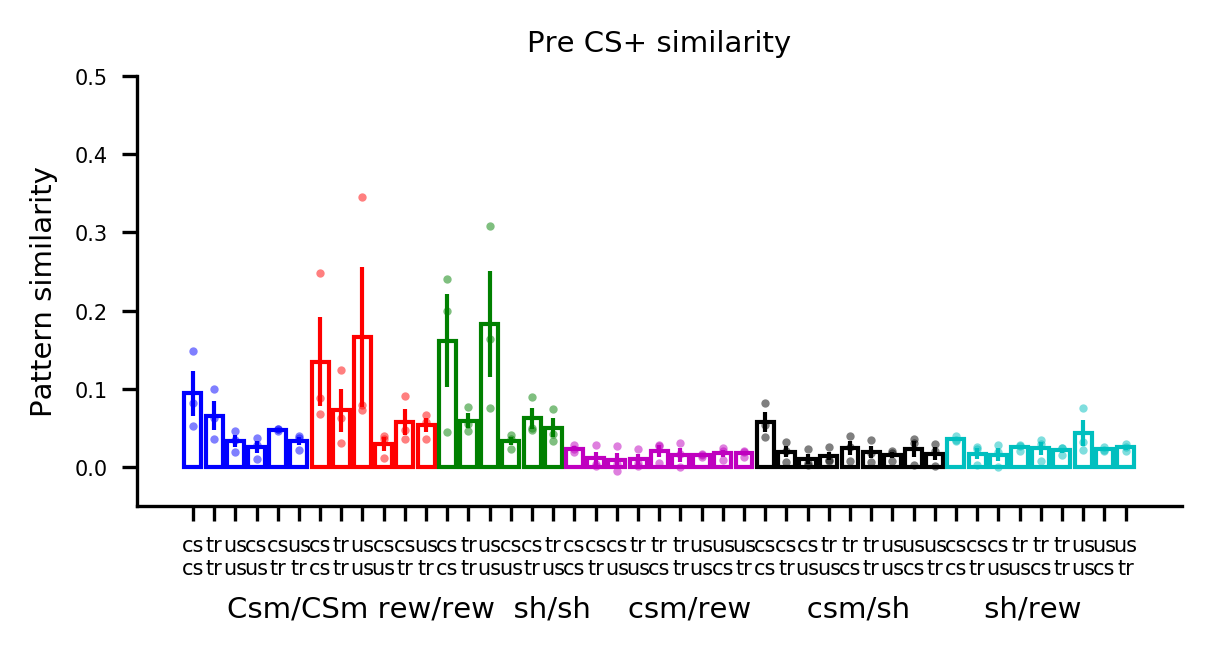

In [20]:
from scipy import stats

fig, ax = pl.subplots(1, 1, figsize=(4, 2))
colors = np.repeat(['b', 'r', 'g', 'm', 'k', 'c'], [6, 6, 6, 9, 9, 9]).tolist()
# pt.plot_violins(values, ax=ax, colors=colors)
positions = range(len(values))
[ax.plot([p]*len(v), v, 'o', mew=0, ms=2, color=c, alpha=0.5, zorder=0) for p, v, c in zip(positions, values, colors)]
pt.plot_bars(values, ax=ax, colors=colors, stderr=True)
# [b.set_color(c) for b, c in zip(bp['boxes'], colors)]
# [b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
# [b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]

ax.set_xticks(range(len(values)))
ax.set_xticklabels(['%s\n%s'%(p[0][-2:], p[1][-2:]) for p in pairs_to_plot], fontsize=5)
ax.set_xlabel('Csm/CSm rew/rew  sh/sh    csm/rew      csm/sh        sh/rew ', fontsize=7)
ax.set_ylim(-0.05, 0.5)
ax.set_ylabel("Pattern similarity")
pt.nicer_plot(ax)

fig.tight_layout()

ax.set_title('Pre CS+ similarity')
fig.savefig("../img/similarity_CSp_JSB.pdf")

In [21]:
pairs_to_plot = [('3odor_post-CSmt-cs', '3odor_post-CSmt-cs'),
                 ('3odor_post-CSmt-tr', '3odor_post-CSmt-tr'),
                 ('3odor_post-CSmt-us', '3odor_post-CSmt-us'),
                 ('3odor_post-CSmt-cs', '3odor_post-CSmt-us'),                                  
                 ('3odor_post-CSmt-cs', '3odor_post-CSmt-tr'),
                 ('3odor_post-CSmt-us', '3odor_post-CSmt-tr'),
                 ('3odor_post-rewardt-cs', '3odor_post-rewardt-cs'),
                 ('3odor_post-rewardt-tr', '3odor_post-rewardt-tr'),
                 ('3odor_post-rewardt-us', '3odor_post-rewardt-us'),               
                 ('3odor_post-rewardt-cs', '3odor_post-rewardt-us'),
                 ('3odor_post-rewardt-cs', '3odor_post-rewardt-tr'),
                 ('3odor_post-rewardt-us', '3odor_post-rewardt-tr'),
                 ('3odor_post-sht-cs', '3odor_post-sht-cs'),
                 ('3odor_post-sht-tr', '3odor_post-sht-tr'),
                 ('3odor_post-sht-us', '3odor_post-sht-us'),
                 ('3odor_post-sht-cs', '3odor_post-sht-us'),
                 ('3odor_post-sht-cs', '3odor_post-sht-tr'),
                 ('3odor_post-sht-tr', '3odor_post-sht-us'),
                 ('3odor_post-CSmt-cs', '3odor_post-rewardt-cs'),
                 ('3odor_post-CSmt-cs', '3odor_post-rewardt-tr'),  
                 ('3odor_post-CSmt-cs', '3odor_post-rewardt-us'),
                 ('3odor_post-CSmt-tr', '3odor_post-rewardt-us'),
                 ('3odor_post-CSmt-tr', '3odor_post-rewardt-cs'),
                 ('3odor_post-CSmt-tr', '3odor_post-rewardt-tr'),
                 ('3odor_post-CSmt-us', '3odor_post-rewardt-us'),
                 ('3odor_post-CSmt-us', '3odor_post-rewardt-cs'),
                 ('3odor_post-CSmt-us', '3odor_post-rewardt-tr'),
                 ('3odor_post-CSmt-cs', '3odor_post-sht-cs'),
                 ('3odor_post-CSmt-cs', '3odor_post-sht-tr'),  
                 ('3odor_post-CSmt-cs', '3odor_post-sht-us'),
                 ('3odor_post-CSmt-tr', '3odor_post-sht-us'),
                 ('3odor_post-CSmt-tr', '3odor_post-sht-cs'),
                 ('3odor_post-CSmt-tr', '3odor_post-sht-tr'),
                 ('3odor_post-CSmt-us', '3odor_post-sht-us'),
                 ('3odor_post-CSmt-us', '3odor_post-sht-cs'),
                 ('3odor_post-CSmt-us', '3odor_post-sht-tr'),
                 ('3odor_post-rewardt-cs', '3odor_post-sht-cs'),
                 ('3odor_post-rewardt-cs', '3odor_post-sht-tr'),  
                 ('3odor_post-rewardt-cs', '3odor_post-sht-us'),
                 ('3odor_post-rewardt-tr', '3odor_post-sht-us'),
                 ('3odor_post-rewardt-tr', '3odor_post-sht-cs'),
                 ('3odor_post-rewardt-tr', '3odor_post-sht-tr'),
                 ('3odor_post-rewardt-us', '3odor_post-sht-us'),
                 ('3odor_post-rewardt-us', '3odor_post-sht-cs'),
                 ('3odor_post-rewardt-us', '3odor_post-sht-tr'),                 
                 
                 ]
values = np.r_[[[np.mean(corrmat_distr[ani][p]) for ani in all_animals] for p in pairs_to_plot]]

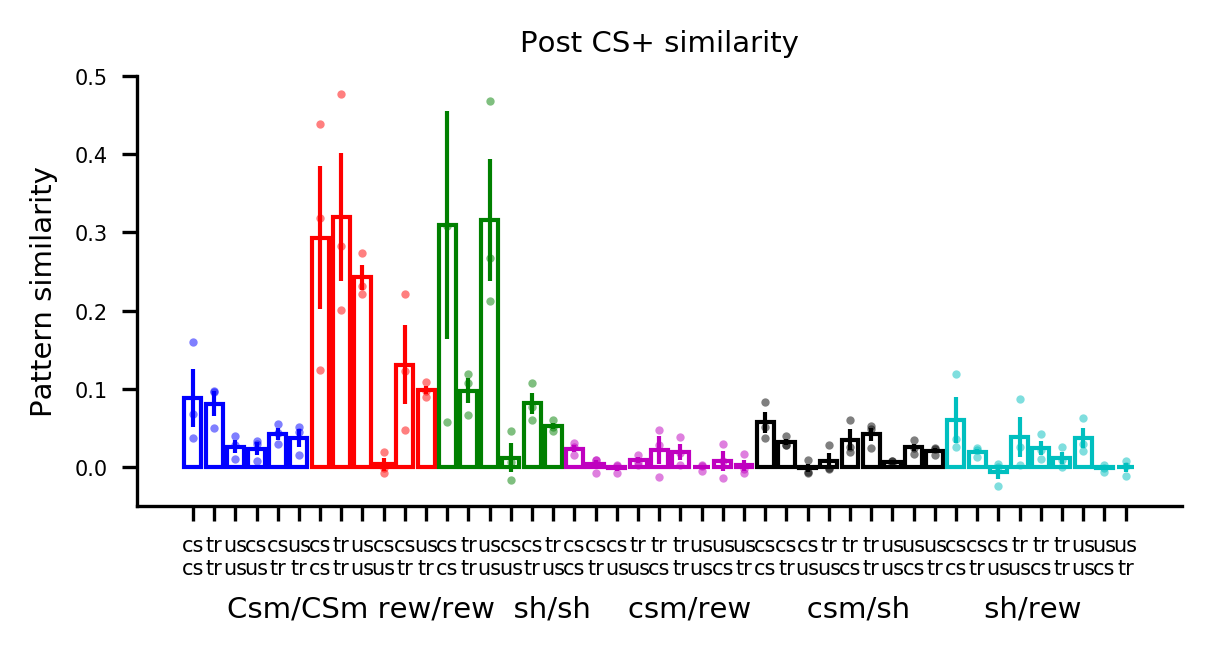

In [22]:
from scipy import stats

fig, ax = pl.subplots(1, 1, figsize=(4, 2))
colors = np.repeat(['b', 'r', 'g', 'm', 'k', 'c'], [6, 6, 6, 9, 9, 9]).tolist()
# pt.plot_violins(values, ax=ax, colors=colors)
positions = range(len(values))
[ax.plot([p]*len(v), v, 'o', mew=0, ms=2, color=c, alpha=0.5, zorder=0) for p, v, c in zip(positions, values, colors)]
pt.plot_bars(values, ax=ax, colors=colors, stderr=True)
# [b.set_color(c) for b, c in zip(bp['boxes'], colors)]
# [b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
# [b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]

ax.set_xticks(range(len(values)))
ax.set_xticklabels(['%s\n%s'%(p[0][-2:], p[1][-2:]) for p in pairs_to_plot], fontsize=5)
ax.set_xlabel('Csm/CSm rew/rew  sh/sh    csm/rew      csm/sh        sh/rew ', fontsize=7)
ax.set_ylim(-0.05, 0.5)
ax.set_ylabel("Pattern similarity")
pt.nicer_plot(ax)

fig.tight_layout()

ax.set_title('Post CS+ similarity')
fig.savefig("../img/similarity_CSp_JSB.pdf")

In [23]:
pairs_to_plot = [('3odor_pre_rev-CSmt-cs', '3odor_pre_rev-CSmt-cs'),
                 ('3odor_pre_rev-CSmt-tr', '3odor_pre_rev-CSmt-tr'),
                 ('3odor_pre_rev-CSmt-us', '3odor_pre_rev-CSmt-us'),
                 ('3odor_pre_rev-CSmt-cs', '3odor_pre_rev-CSmt-us'),                                  
                 ('3odor_pre_rev-CSmt-cs', '3odor_pre_rev-CSmt-tr'),
                 ('3odor_pre_rev-CSmt-us', '3odor_pre_rev-CSmt-tr'),
                 ('3odor_pre_rev-rewardt-cs', '3odor_pre_rev-rewardt-cs'),
                 ('3odor_pre_rev-rewardt-tr', '3odor_pre_rev-rewardt-tr'),
                 ('3odor_pre_rev-rewardt-us', '3odor_pre_rev-rewardt-us'),               
                 ('3odor_pre_rev-rewardt-cs', '3odor_pre_rev-rewardt-us'),
                 ('3odor_pre_rev-rewardt-cs', '3odor_pre_rev-rewardt-tr'),
                 ('3odor_pre_rev-rewardt-us', '3odor_pre_rev-rewardt-tr'),
                 ('3odor_pre_rev-sht-cs', '3odor_pre_rev-sht-cs'),
                 ('3odor_pre_rev-sht-tr', '3odor_pre_rev-sht-tr'),
                 ('3odor_pre_rev-sht-us', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-sht-cs', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-sht-cs', '3odor_pre_rev-sht-tr'),
                 ('3odor_pre_rev-sht-tr', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-CSmt-cs', '3odor_pre_rev-rewardt-cs'),
                 ('3odor_pre_rev-CSmt-cs', '3odor_pre_rev-rewardt-tr'),  
                 ('3odor_pre_rev-CSmt-cs', '3odor_pre_rev-rewardt-us'),
                 ('3odor_pre_rev-CSmt-tr', '3odor_pre_rev-rewardt-us'),
                 ('3odor_pre_rev-CSmt-tr', '3odor_pre_rev-rewardt-cs'),
                 ('3odor_pre_rev-CSmt-tr', '3odor_pre_rev-rewardt-tr'),
                 ('3odor_pre_rev-CSmt-us', '3odor_pre_rev-rewardt-us'),
                 ('3odor_pre_rev-CSmt-us', '3odor_pre_rev-rewardt-cs'),
                 ('3odor_pre_rev-CSmt-us', '3odor_pre_rev-rewardt-tr'),
                 ('3odor_pre_rev-CSmt-cs', '3odor_pre_rev-sht-cs'),
                 ('3odor_pre_rev-CSmt-cs', '3odor_pre_rev-sht-tr'),  
                 ('3odor_pre_rev-CSmt-cs', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-CSmt-tr', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-CSmt-tr', '3odor_pre_rev-sht-cs'),
                 ('3odor_pre_rev-CSmt-tr', '3odor_pre_rev-sht-tr'),
                 ('3odor_pre_rev-CSmt-us', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-CSmt-us', '3odor_pre_rev-sht-cs'),
                 ('3odor_pre_rev-CSmt-us', '3odor_pre_rev-sht-tr'),
                 ('3odor_pre_rev-rewardt-cs', '3odor_pre_rev-sht-cs'),
                 ('3odor_pre_rev-rewardt-cs', '3odor_pre_rev-sht-tr'),  
                 ('3odor_pre_rev-rewardt-cs', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-rewardt-tr', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-rewardt-tr', '3odor_pre_rev-sht-cs'),
                 ('3odor_pre_rev-rewardt-tr', '3odor_pre_rev-sht-tr'),
                 ('3odor_pre_rev-rewardt-us', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-rewardt-us', '3odor_pre_rev-sht-cs'),
                 ('3odor_pre_rev-rewardt-us', '3odor_pre_rev-sht-tr'),
                 ]
values = np.r_[[[np.mean(corrmat_distr[ani][p]) for ani in all_animals] for p in pairs_to_plot]]

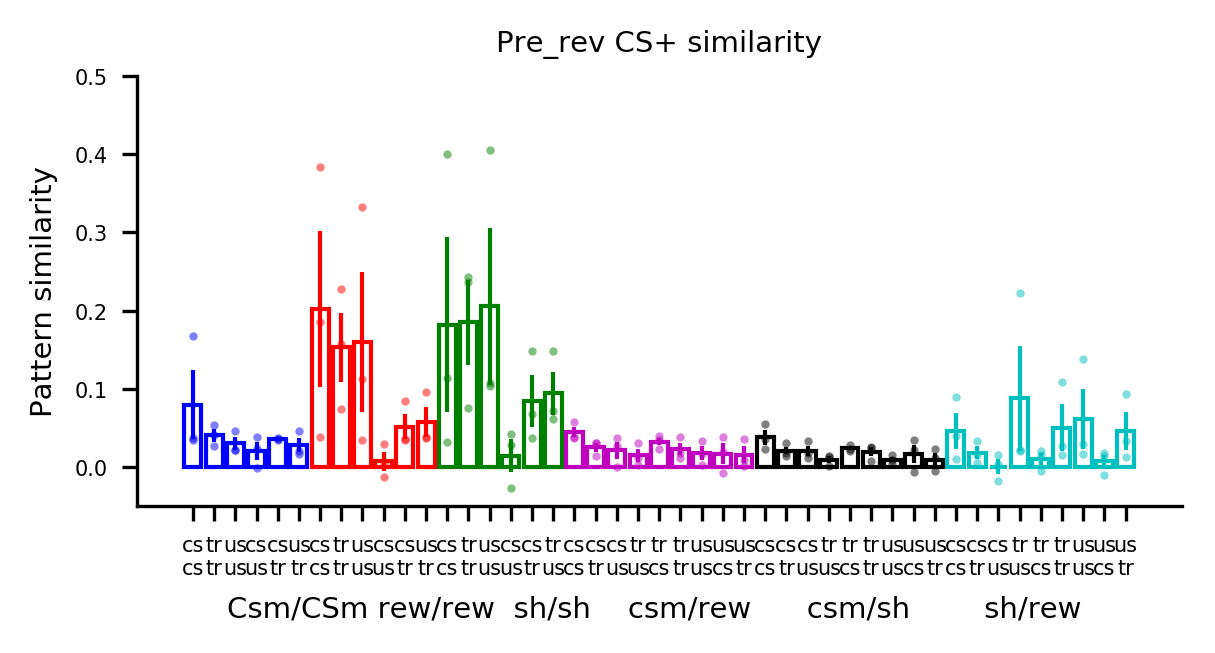

In [24]:
from scipy import stats

fig, ax = pl.subplots(1, 1, figsize=(4, 2))
colors = np.repeat(['b', 'r', 'g', 'm', 'k', 'c'], [6, 6, 6, 9, 9, 9]).tolist()
# pt.plot_violins(values, ax=ax, colors=colors)
positions = range(len(values))
[ax.plot([p]*len(v), v, 'o', mew=0, ms=2, color=c, alpha=0.5, zorder=0) for p, v, c in zip(positions, values, colors)]
pt.plot_bars(values, ax=ax, colors=colors, stderr=True)
# [b.set_color(c) for b, c in zip(bp['boxes'], colors)]
# [b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
# [b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]

ax.set_xticks(range(len(values)))
ax.set_xticklabels(['%s\n%s'%(p[0][-2:], p[1][-2:]) for p in pairs_to_plot], fontsize=5)
ax.set_xlabel('Csm/CSm rew/rew  sh/sh    csm/rew      csm/sh        sh/rew ', fontsize=7)
ax.set_ylim(-0.05, 0.5)
ax.set_ylabel("Pattern similarity")
pt.nicer_plot(ax)

fig.tight_layout()

ax.set_title('Pre_rev CS+ similarity')
fig.savefig("../img/similarity_CSp_JSB.pdf")

In [25]:
pairs_to_plot = [('3odor_post_rev-CSmt-cs', '3odor_post_rev-CSmt-cs'),
                 ('3odor_post_rev-CSmt-tr', '3odor_post_rev-CSmt-tr'),
                 ('3odor_post_rev-CSmt-us', '3odor_post_rev-CSmt-us'),
                 ('3odor_post_rev-CSmt-cs', '3odor_post_rev-CSmt-us'),                                  
                 ('3odor_post_rev-CSmt-cs', '3odor_post_rev-CSmt-tr'),
                 ('3odor_post_rev-CSmt-us', '3odor_post_rev-CSmt-tr'),
                 ('3odor_post_rev-rewardt-cs', '3odor_post_rev-rewardt-cs'),
                 ('3odor_post_rev-rewardt-tr', '3odor_post_rev-rewardt-tr'),
                 ('3odor_post_rev-rewardt-us', '3odor_post_rev-rewardt-us'),               
                 ('3odor_post_rev-rewardt-cs', '3odor_post_rev-rewardt-us'),
                 ('3odor_post_rev-rewardt-cs', '3odor_post_rev-rewardt-tr'),
                 ('3odor_post_rev-rewardt-us', '3odor_post_rev-rewardt-tr'),
                 ('3odor_post_rev-sht-cs', '3odor_post_rev-sht-cs'),
                 ('3odor_post_rev-sht-tr', '3odor_post_rev-sht-tr'),
                 ('3odor_post_rev-sht-us', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-sht-cs', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-sht-cs', '3odor_post_rev-sht-tr'),
                 ('3odor_post_rev-sht-tr', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-CSmt-cs', '3odor_post_rev-rewardt-cs'),
                 ('3odor_post_rev-CSmt-cs', '3odor_post_rev-rewardt-tr'),  
                 ('3odor_post_rev-CSmt-cs', '3odor_post_rev-rewardt-us'),
                 ('3odor_post_rev-CSmt-tr', '3odor_post_rev-rewardt-us'),
                 ('3odor_post_rev-CSmt-tr', '3odor_post_rev-rewardt-cs'),
                 ('3odor_post_rev-CSmt-tr', '3odor_post_rev-rewardt-tr'),
                 ('3odor_post_rev-CSmt-us', '3odor_post_rev-rewardt-us'),
                 ('3odor_post_rev-CSmt-us', '3odor_post_rev-rewardt-cs'),
                 ('3odor_post_rev-CSmt-us', '3odor_post_rev-rewardt-tr'),
                 ('3odor_post_rev-CSmt-cs', '3odor_post_rev-sht-cs'),
                 ('3odor_post_rev-CSmt-cs', '3odor_post_rev-sht-tr'),  
                 ('3odor_post_rev-CSmt-cs', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-CSmt-tr', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-CSmt-tr', '3odor_post_rev-sht-cs'),
                 ('3odor_post_rev-CSmt-tr', '3odor_post_rev-sht-tr'),
                 ('3odor_post_rev-CSmt-us', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-CSmt-us', '3odor_post_rev-sht-cs'),
                 ('3odor_post_rev-CSmt-us', '3odor_post_rev-sht-tr'),
                 ('3odor_post_rev-rewardt-cs', '3odor_post_rev-sht-cs'),
                 ('3odor_post_rev-rewardt-cs', '3odor_post_rev-sht-tr'),  
                 ('3odor_post_rev-rewardt-cs', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-rewardt-tr', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-rewardt-tr', '3odor_post_rev-sht-cs'),
                 ('3odor_post_rev-rewardt-tr', '3odor_post_rev-sht-tr'),
                 ('3odor_post_rev-rewardt-us', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-rewardt-us', '3odor_post_rev-sht-cs'),
                 ('3odor_post_rev-rewardt-us', '3odor_post_rev-sht-tr'),                 
                 
                 ]
values = np.r_[[[np.mean(corrmat_distr[ani][p]) for ani in all_animals] for p in pairs_to_plot]]

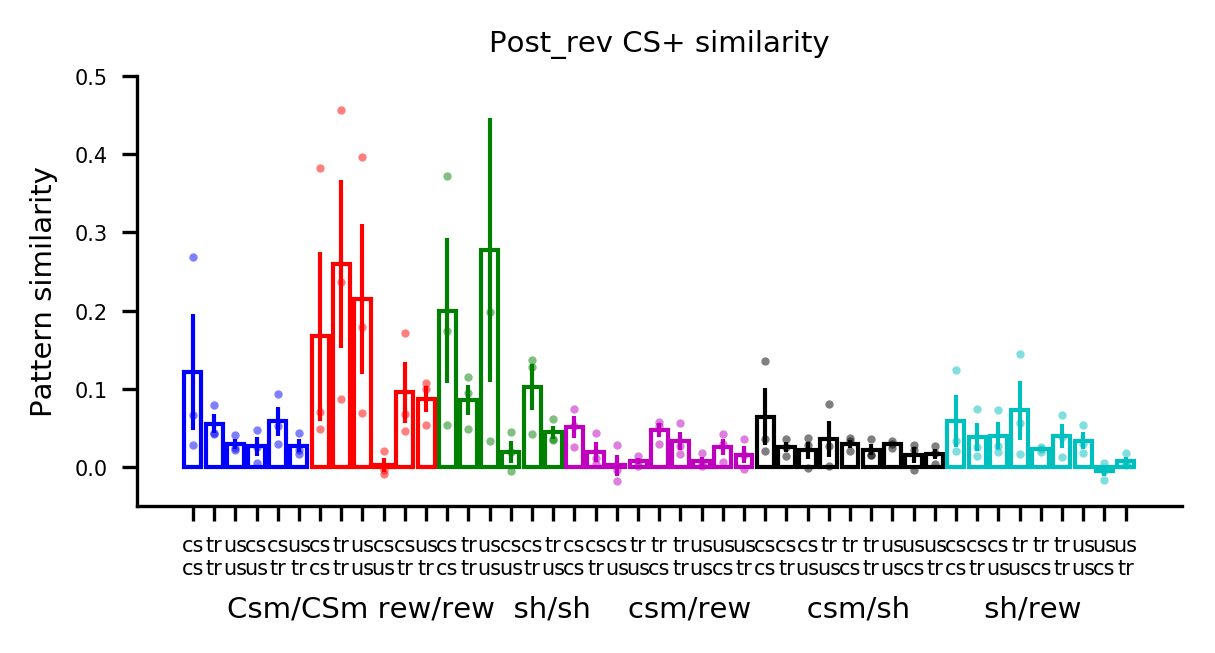

In [26]:
from scipy import stats

fig, ax = pl.subplots(1, 1, figsize=(4, 2))
colors = np.repeat(['b', 'r', 'g', 'm', 'k', 'c'], [6, 6, 6, 9, 9, 9]).tolist()
# pt.plot_violins(values, ax=ax, colors=colors)
positions = range(len(values))
[ax.plot([p]*len(v), v, 'o', mew=0, ms=2, color=c, alpha=0.5, zorder=0) for p, v, c in zip(positions, values, colors)]
pt.plot_bars(values, ax=ax, colors=colors, stderr=True)
# [b.set_color(c) for b, c in zip(bp['boxes'], colors)]
# [b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
# [b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]

ax.set_xticks(range(len(values)))
ax.set_xticklabels(['%s\n%s'%(p[0][-2:], p[1][-2:]) for p in pairs_to_plot], fontsize=5)
ax.set_xlabel('Csm/CSm rew/rew  sh/sh    csm/rew      csm/sh        sh/rew ', fontsize=7)
ax.set_ylim(-0.05, 0.5)
ax.set_ylabel("Pattern similarity")
pt.nicer_plot(ax)

fig.tight_layout()

ax.set_title('Post_rev CS+ similarity')
fig.savefig("../img/similarity_CSp_JSB.pdf")

In [27]:
pairs_to_plot = [('3odor_pre-CSmt-cstr', '3odor_pre-CSmt-cstr'),
                 ('3odor_pre-CSmt-us', '3odor_pre-CSmt-us'),
                 ('3odor_pre-CSmt-cstr', '3odor_pre-CSmt-us'),
                 ('3odor_pre-sht-cstr', '3odor_pre-sht-cstr'),
                 ('3odor_pre-sht-us', '3odor_pre-sht-us'),
                 ('3odor_pre-sht-cstr', '3odor_pre-sht-us'),
                 ('3odor_pre-rewardt-cstr', '3odor_pre-rewardt-cstr'),
                 ('3odor_pre-rewardt-us', '3odor_pre-rewardt-us'),
                 ('3odor_pre-rewardt-cstr', '3odor_pre-rewardt-us'),
                 ('3odor_post-CSmt-cstr', '3odor_post-CSmt-cstr'),
                 ('3odor_post-CSmt-us', '3odor_post-CSmt-us'),
                 ('3odor_post-CSmt-cstr', '3odor_post-CSmt-us'),
                 ('3odor_post-sht-cstr', '3odor_post-sht-cstr'),
                 ('3odor_post-sht-us', '3odor_post-sht-us'),
                 ('3odor_post-sht-cstr', '3odor_post-sht-us'),
                 ('3odor_post-rewardt-cstr', '3odor_post-rewardt-cstr'),
                 ('3odor_post-rewardt-us', '3odor_post-rewardt-us'),
                 ('3odor_post-rewardt-cstr', '3odor_post-rewardt-us'),
                 ('3odor_pre_rev-CSmt-cstr', '3odor_pre_rev-CSmt-cstr'),
                 ('3odor_pre_rev-CSmt-us', '3odor_pre_rev-CSmt-us'),
                 ('3odor_pre_rev-CSmt-cstr', '3odor_pre_rev-CSmt-us'),
                 ('3odor_pre_rev-sht-cstr', '3odor_pre_rev-sht-cstr'),
                 ('3odor_pre_rev-sht-us', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-sht-cstr', '3odor_pre_rev-sht-us'),
                 ('3odor_pre_rev-rewardt-cstr', '3odor_pre_rev-rewardt-cstr'),
                 ('3odor_pre_rev-rewardt-us', '3odor_pre_rev-rewardt-us'),
                 ('3odor_pre_rev-rewardt-cstr', '3odor_pre_rev-rewardt-us'),
                 ('3odor_post_rev-CSmt-cstr', '3odor_post_rev-CSmt-cstr'),
                 ('3odor_post_rev-CSmt-us', '3odor_post_rev-CSmt-us'),
                 ('3odor_post_rev-CSmt-cstr', '3odor_post_rev-CSmt-us'),
                 ('3odor_post_rev-sht-cstr', '3odor_post_rev-sht-cstr'),
                 ('3odor_post_rev-sht-us', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-sht-cstr', '3odor_post_rev-sht-us'),
                 ('3odor_post_rev-rewardt-cstr', '3odor_post_rev-rewardt-cstr'),
                 ('3odor_post_rev-rewardt-us', '3odor_post_rev-rewardt-us'),
                 ('3odor_post_rev-rewardt-cstr', '3odor_post_rev-rewardt-us'),
                 ]
values = np.r_[[[np.mean(corrmat_distr[ani][p]) for ani in all_animals] for p in pairs_to_plot]]

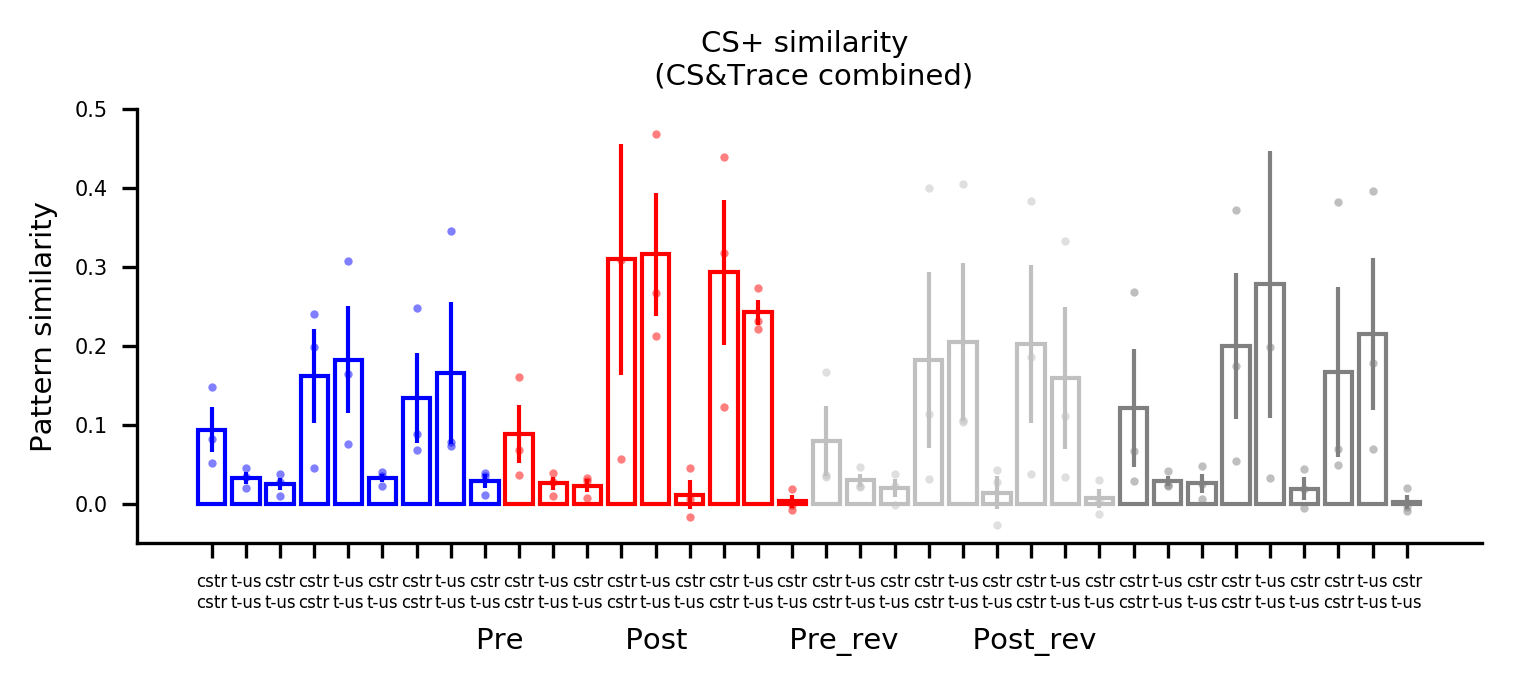

In [28]:
from scipy import stats

fig, ax = pl.subplots(1, 1, figsize=(5, 2))
colors = np.repeat(['b', 'r', 'silver', 'grey',], [9,9,9,9]).tolist()
# pt.plot_violins(values, ax=ax, colors=colors)
positions = range(len(values))
[ax.plot([p]*len(v), v, 'o', mew=0, ms=2, color=c, alpha=0.5, zorder=0) for p, v, c in zip(positions, values, colors)]
pt.plot_bars(values, ax=ax, colors=colors, stderr=True)
# [b.set_color(c) for b, c in zip(bp['boxes'], colors)]
# [b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
# [b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]

ax.set_xticks(range(len(values)))
ax.set_xticklabels(['%s\n%s'%(p[0][-4:], p[1][-4:]) for p in pairs_to_plot], fontsize=4)
ax.set_xlabel('Pre           Post           Pre_rev        Post_rev     ', fontsize=7)
ax.set_ylim(-0.05, 0.5)
ax.set_ylabel("Pattern similarity")
pt.nicer_plot(ax)

fig.tight_layout()

ax.set_title('CS+ similarity \n (CS&Trace combined)')
fig.savefig("../img/similarity_CSp__cstr_JSB.pdf")

In [29]:
save_workspace(db)

Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'stats'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
